In [1]:
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')
import numpy as np
import pandas as pd
import os
import pickle 

### Plot the underwater current and vorticity
Write now we are plotting P=0.008,0.016,0.02. Not sure if we'll add 0.03 or 0.01

In [4]:
# Compute Stokes drift given the spectrum
def spectrum_us(k, F, zarray):   
    """ Given the spectrum and the z coordinate, compute the stokes drift. """  
    
    us = np.zeros(len(zarray))
    dk = np.roll(k, -1) - k # now dk is varying
    dk = np.array(dk); dk[-1]=0    
    g = 9.8
    for i,z in enumerate(zarray):
        us[i] = 2*g**0.5*np.sum(k**1.5*F*dk*np.exp(2*k*z))
        
    return us

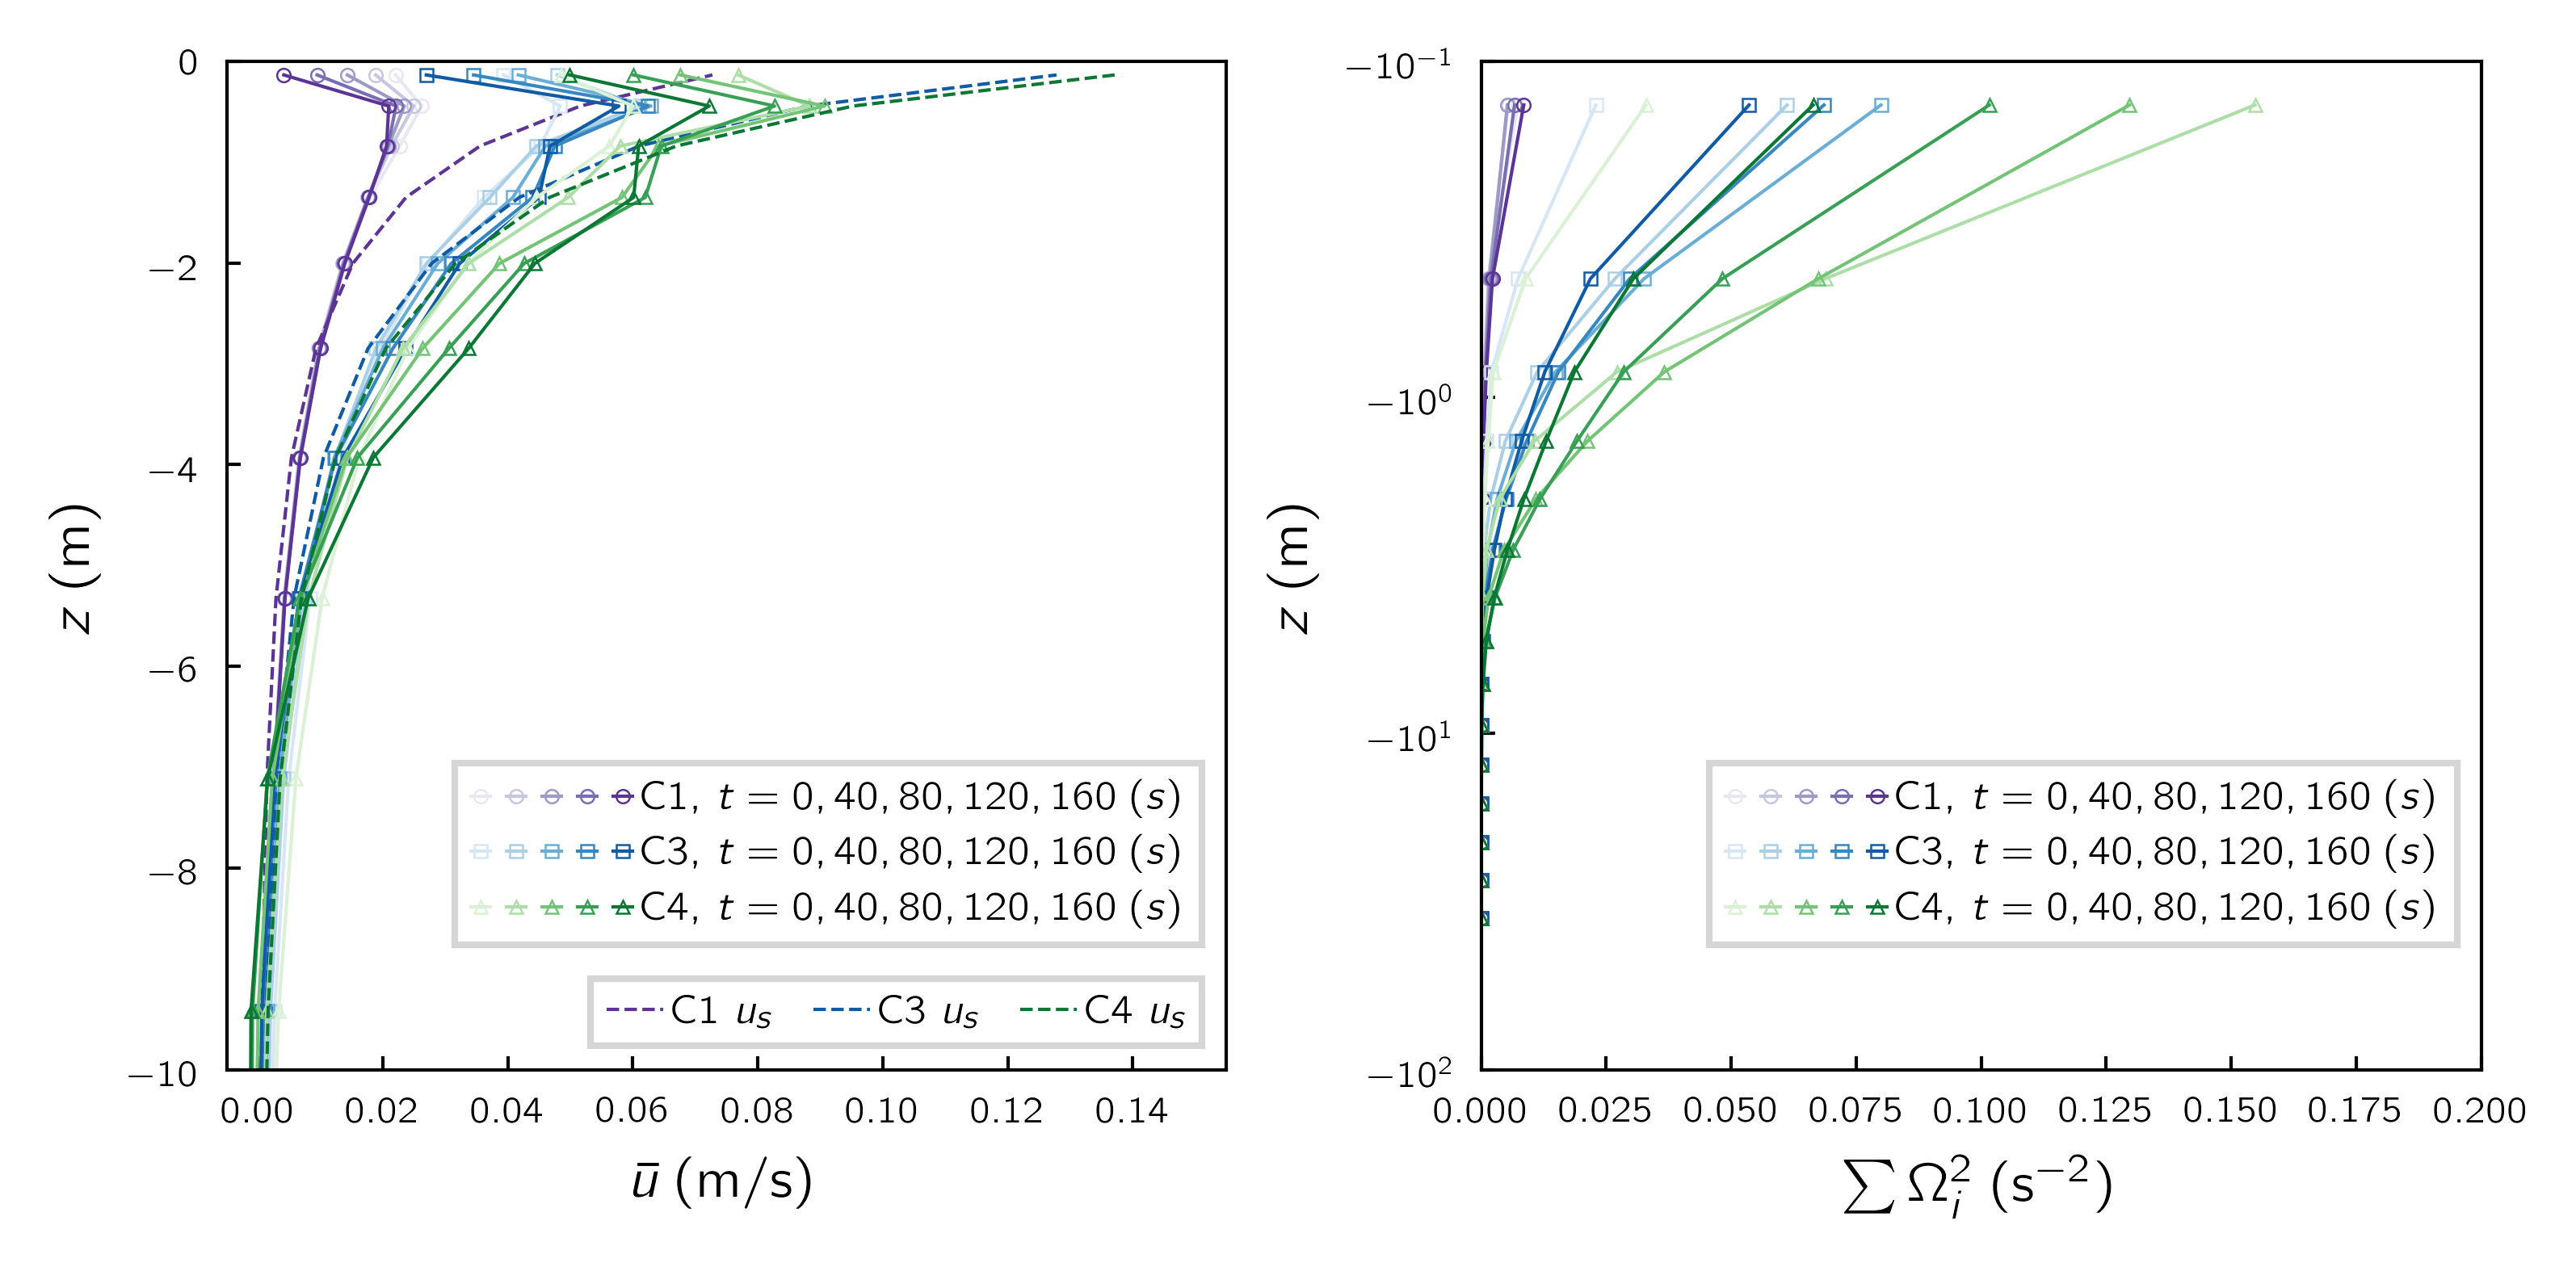

In [5]:
fig, axes = plt.subplots (1, 2, figsize=[5.2,2.5], constrained_layout=True)

colormaps = ('Purples','Blues','Greens')
ls = ('-o','-s','-^')
lu_times_cases = []
lomega2_times_cases = []
l_stokes_cases = []

for i,label in enumerate(('C1','C3','C4')):
    # First plot the mean horizontal velocity
    lu_times = []
    lomega2_times = []
    for j,t in enumerate((0,40,80,120,160)):
        filename = '../../multilayer/JFM2023/compilation/' + 'fieldsample_' + label + '_t%g.nc' %t 
        ds = xr.open_dataset(filename, engine='h5netcdf')
        omega2 = ds.omegax**2 + ds.omegay**2 + ds.omegaz**2
        omega2mean = omega2.mean(["x","y"]).to_numpy()
        uxmean = ds.ux.mean(["x","y"]).to_numpy()
        zmean = ds.z.mean(["x","y"]).to_numpy()
        ds.close()
        lu, = axes[0].plot(uxmean, zmean, ls[i], c=plt.get_cmap(colormaps[i])((j+1)/6))
        lomega, = axes[1].plot(omega2mean, zmean, ls[i], c=plt.get_cmap(colormaps[i])((j+1)/6))
        lu_times.append(lu)
        lomega2_times.append(lomega)
    lu_times_cases.append(lu_times)
    lomega2_times_cases.append(lomega2_times)
    
    # Then plot the corresponding Stokes drift magnitude
    filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    us = spectrum_us(diss.kbins, diss.F[-1], zmean) # The last time step in the dissipation file (t=160-180)
    l, = axes[0].plot(us, zmean, '--', c=plt.get_cmap(colormaps[i])(5/6))
    l_stokes_cases.append(l)

# Add legends        
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
times = np.array((0,40,80,120,160))
times_ = np.array2string(times, precision=0, separator=',')
leg1 = axes[0].legend([tuple(lu_times_cases[0]),tuple(lu_times_cases[1]),tuple(lu_times_cases[2])],
                      ['C1, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times), 'C3, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times), 'C4, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times)],
                      handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=4, loc='lower right', bbox_transform=axes[0].transAxes, bbox_to_anchor=(0.5,0.1,0.5,0.5), fontsize=6)
# If a 4-tuple or BboxBase is given, then it specifies the bbox (x, y, width, height) that the legend is placed in.
leg2 = axes[0].legend(tuple(l_stokes_cases), ['C1 $u_s$','C3 $u_s$','C4 $u_s$'], ncol=3, loc='lower right', fontsize=6)
    
# axes[0].set_yscale('symlog', linthresh=1e-2)
# axes[0].set_ylim([-30,-0.1])
axes[0].set_ylim([-10,0])
axes[0].set_xlim([-0.005,0.155])
axes[0].set_xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); axes[0].set_ylabel(r'$z\:\mathrm{ (m)}$')
axes[0].add_artist(leg1)

axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].set_ylim([-100,-0.1])
axes[1].set_xlim([0,0.2])
axes[1].set_xlabel(r'$\sum \Omega_i^2\:\mathrm{ (s^{-2})}$'); axes[1].set_ylabel(r'$z\:\mathrm{ (m)}$')

leg = axes[1].legend([tuple(lomega2_times_cases[0]),tuple(lomega2_times_cases[1]),tuple(lomega2_times_cases[2])],
                     ['C1, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times), 'C3, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times), 'C4, $t=%.0f,%.0f,%.0f,%.0f,%.0f \;(s)$' %tuple(times)],
                     handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=4, loc='lower right', bbox_transform=axes[1].transAxes, bbox_to_anchor=(0.5,0.1,0.5,0.5), fontsize=6)

plt.savefig('../figures/multilayer-diss/fig3.pdf', bbox_inches='tight')

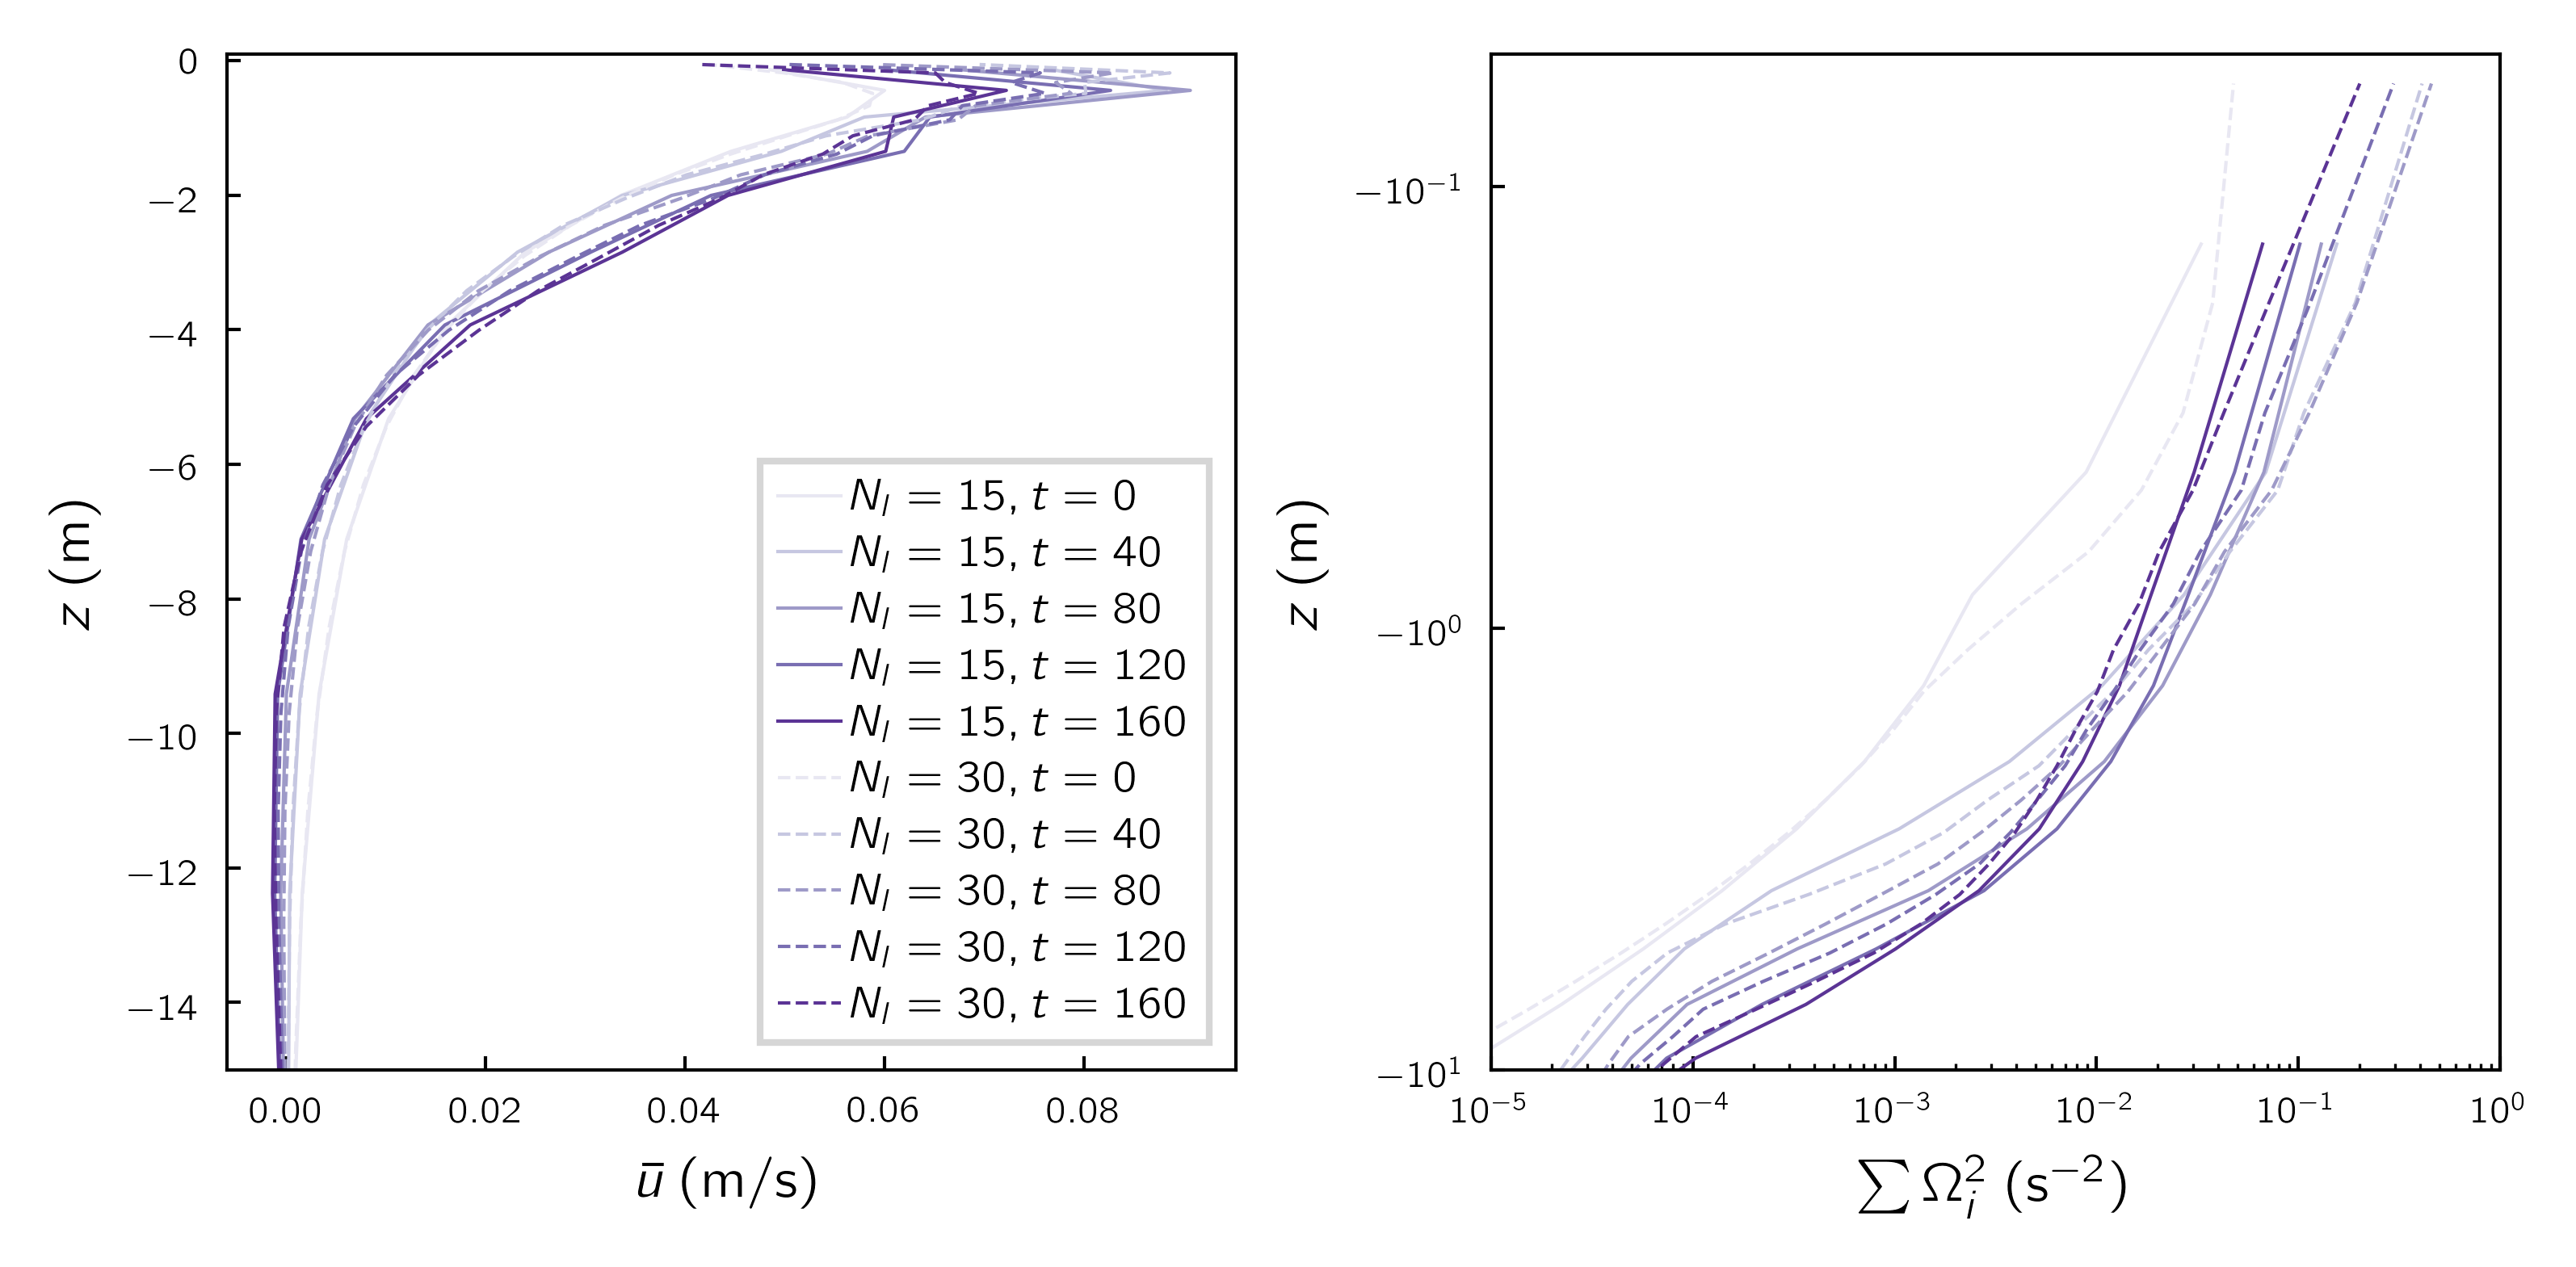

In [33]:
fig,axes = plt.subplots (1, 2, figsize=[5.2,2.5], constrained_layout=True)

label = 'C4'; i = 0
for j,t in enumerate((0,40,80,120,160)):
    filename = '../../multilayer/JFM2023/compilation/' + 'fieldsample_' + label + '_t%g.nc' %t 
    ds = xr.open_dataset(filename, engine='h5netcdf')
    omega2 = ds.omegax**2 + ds.omegay**2 + ds.omegaz**2
    omega2mean = omega2.mean(["x","y"]).to_numpy()
    uxmean = ds.ux.mean(["x","y"]).to_numpy()
    zmean = ds.z.mean(["x","y"]).to_numpy()
    ds.close()
    lu, = axes[0].plot(uxmean, zmean, c=plt.get_cmap(colormaps[i])((j+1)/6), label='$N_l=15, t=%g$' %t)
    lomega, = axes[1].plot(omega2mean, zmean, c=plt.get_cmap(colormaps[i])((j+1)/6), label='$N_l=15, t=%g$' %t)

    
label = 'Cvalid1'; i = 0
for j,t in enumerate((0,40,80,120,160)):
    filename = '../../multilayer/JFM2023/compilation/' + 'fieldsample_' + label + '_t%g.nc' %t 
    ds = xr.open_dataset(filename, engine='h5netcdf')
    omega2 = ds.omegax**2 + ds.omegay**2 + ds.omegaz**2
    omega2mean = omega2.mean(["x","y"]).to_numpy()
    uxmean = ds.ux.mean(["x","y"]).to_numpy()
    zmean = ds.z.mean(["x","y"]).to_numpy()
    ds.close()
    lu, = axes[0].plot(uxmean, zmean, '--', c=plt.get_cmap(colormaps[i])((j+1)/6), label='$N_l=30, t=%g$' %t)
    lomega, = axes[1].plot(omega2mean, zmean, '--', c=plt.get_cmap(colormaps[i])((j+1)/6), label='$N_l=30, t=%g$' %t)

# phi = np.trapz(omega2mean, x=zmean)
# filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + label + '_t%g.nc' %t
# diss = xr.open_dataset(filename, engine='h5netcdf')
# Hs = diss.Hs.sel(tbin=tbin).values
# sigma = diss.sigma.sel(tbin=tbin).values
# cc = mpl.colormaps['Oranges']((sigma-0.05)/(0.2-0.05)) 
# axes[0].plot(omega2mean, zmean, '.-', label=r'$\sigma=%.3f$' %sigma, c=cc)
# # axes[0].plot(epsilon,z,'.-',label=r'$\sigma=%.3f$' %case.mu_plateau, c=case.cc)
# lomega, axes[1].plot(omega2mean[3:]*Hs/phi,zmean[3:]/Hs,'.-',c=cc)

# lu, = axes[1].plot(omega2mean, zmean, ls[i], c=plt.get_cmap(colormaps[i])((j+1)/6), label=label)

    
axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].set_xscale('log')
axes[0].set_ylim([-15, 0.1])
axes[1].set_ylim([-10, -0.05])
axes[1].set_xlim([10**(-5), 1])
# axes[1].set_xlim([0.001,14])
axes[0].set_xlabel(r'$\bar{u}\:\mathrm{ (m/s)}$'); axes[0].set_ylabel(r'$z\:\mathrm{ (m)}$')
axes[1].set_xlabel(r'$\sum \Omega_i^2\:\mathrm{ (s^{-2})}$'); axes[1].set_ylabel(r'$z\:\mathrm{ (m)}$')

axes[0].legend()
# axes[1].legend()

In [75]:
# Compute Phi for all cases and save
Phi_dict_ensem = []
for label in ('C1','C3','C2','C4','C5'):
    for t in (0,40,80,120,160,110,130,150,170):
        filename = '../../multilayer/JFM2023/compilation/' + 'fieldsample_' + label + '_t%g.nc' %t 
        ds = xr.open_dataset(filename, engine='h5netcdf')
        omega2 = ds.omegax**2 + ds.omegay**2 + ds.omegaz**2
        omega2mean = omega2.mean(["x","y"])
        zmean = ds.z.mean(["x","y"]).to_numpy()
        ds.close()
        
        # For normalization
        Phi = np.trapz(omega2mean, x=zmean)
        Phi_dict = dict({'case':label, 't':t, 'Phi':Phi})
        Phi_dict_ensem.append(Phi_dict)
    
filehandler = open('./datalocal/Phi_dict_ensem.pkl','wb')
pickle.dump(Phi_dict_ensem,filehandler)
filehandler.close()